## Homework 3

* sklearn.datasets sınıfında "make_classification" fonksiyonunu kullanarak veri kümesi oluşturun. Tek etiket (y) 9 özellik (X) ile 10000 örnek oluşturun. Ayrıca şu parametreleri kullanın: 
    * `n_informative` = 4
    *  `class_sep` = 2
    * `random_state` = 18
* Ham veriyi inceleyin ve analiz edin.
* Sınıflandırma (classification) için ön işlem yapın.
* Veri kümenizi eğitim ve test alt kümlerine ayırın (eğitim için 0.7 ve test için 0.3 oran olacak şekilde).
* Karar Ağacı ve XGBoost Algoritmasını farklı hiperparametrelerle deneyin. (GridSearchCV kullanabilirisiniz.)
* Sonucunuzu hem eğitim hem de test setinde değerlendirin. Herhangi bir yetersiz uyum (underfitting) veya aşırı uyum (overfitting) sorunu olup olmadığını analiz edin ve yorumlayın.

In [1]:
# Gerekli kitaplıkları içe aktarın.
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [2]:
# Sklearn'de make_classification fonksiyonunu kullanarak veri kümesi oluşturun.
# Pandas veri çerçevesine dönüştürün.
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=10000, n_features=9,n_informative = 4,class_sep = 2, random_state = 18)

In [3]:
X

array([[ 3.2904893 , -0.4118273 , -0.60069492, ..., -5.71790897,
        -0.17922634, -0.91416131],
       [-0.54341292, -3.78251214,  0.39063746, ...,  1.21814681,
         0.00770833, -0.95737447],
       [-2.69789813, -3.86246721, -0.40727201, ...,  1.41664711,
         0.58362219,  1.33209176],
       ...,
       [ 5.56585297,  3.1620078 , -0.41097295, ..., -2.39971108,
        -0.1402757 ,  0.71755333],
       [-3.31224423, -2.72679148, -1.63719078, ...,  1.4900917 ,
         0.83743715,  1.49126798],
       [ 0.82242537,  2.55171039,  1.26768192, ..., -1.75306244,
        -0.91078137,  0.27139769]])

In [4]:
df1 = pd.DataFrame(X, columns = ['A','B','C', 'D', 'E', 'F','G','H','I'])
df1

,A,B,C,D,E,F,G,H,I
0,3.290489,-0.411827,-0.600695,-4.250619,-0.209376,1.019036,-5.717909,-0.179226,-0.914161
1,-0.543413,-3.782512,0.390637,0.023942,2.010453,1.185315,1.218147,0.007708,-0.957374
2,-2.697898,-3.862467,-0.407272,-0.704430,2.803621,2.080082,1.416647,0.583622,1.332092
3,1.051777,-3.129374,-0.499094,0.575599,-0.894801,1.997441,1.938695,-0.113648,0.882476
4,2.913780,2.582148,-1.755320,-2.224739,-5.067421,2.062468,-2.614919,-1.154300,0.303457
...,...,...,...,...,...,...,...,...,...
9995,2.748612,2.334336,-0.215422,-0.743142,-5.163866,1.608074,-0.916196,-0.322332,2.451602
9996,3.309771,-1.234190,-0.049615,1.360582,-5.364357,2.779653,2.658484,0.584260,0.241696
9997,5.565853,3.162008,-0.410973,-1.933915,-8.630947,3.057350,-2.399711,-0.140276,0.717553
9998,-3.312244,-2.726791,-1.637191,-1.164315,1.346862,3.053202,1.490092,0.837437,1.491268


In [5]:
y

array([0, 0, 1, ..., 0, 1, 0])

In [6]:
df2 = pd.DataFrame(y,  columns = ['Label'])
df2

,Label
0,0
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,0
9998,1


In [7]:
df=pd.concat([df1, df2], axis=1)
df

,A,B,C,D,E,F,G,H,I,Label
0,3.290489,-0.411827,-0.600695,-4.250619,-0.209376,1.019036,-5.717909,-0.179226,-0.914161,0
1,-0.543413,-3.782512,0.390637,0.023942,2.010453,1.185315,1.218147,0.007708,-0.957374,0
2,-2.697898,-3.862467,-0.407272,-0.704430,2.803621,2.080082,1.416647,0.583622,1.332092,1
3,1.051777,-3.129374,-0.499094,0.575599,-0.894801,1.997441,1.938695,-0.113648,0.882476,0
4,2.913780,2.582148,-1.755320,-2.224739,-5.067421,2.062468,-2.614919,-1.154300,0.303457,0
...,...,...,...,...,...,...,...,...,...,...
9995,2.748612,2.334336,-0.215422,-0.743142,-5.163866,1.608074,-0.916196,-0.322332,2.451602,0
9996,3.309771,-1.234190,-0.049615,1.360582,-5.364357,2.779653,2.658484,0.584260,0.241696,0
9997,5.565853,3.162008,-0.410973,-1.933915,-8.630947,3.057350,-2.399711,-0.140276,0.717553,0
9998,-3.312244,-2.726791,-1.637191,-1.164315,1.346862,3.053202,1.490092,0.837437,1.491268,1


In [8]:
# Yinelenen satırları ve eksik verileri kontrol edin.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       10000 non-null  float64
 1   B       10000 non-null  float64
 2   C       10000 non-null  float64
 3   D       10000 non-null  float64
 4   E       10000 non-null  float64
 5   F       10000 non-null  float64
 6   G       10000 non-null  float64
 7   H       10000 non-null  float64
 8   I       10000 non-null  float64
 9   Label   10000 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 781.4 KB


In [10]:
df.duplicated().sum()

0

In [11]:
df.isna().sum()

A        0
B        0
C        0
D        0
E        0
F        0
G        0
H        0
I        0
Label    0
dtype: int64

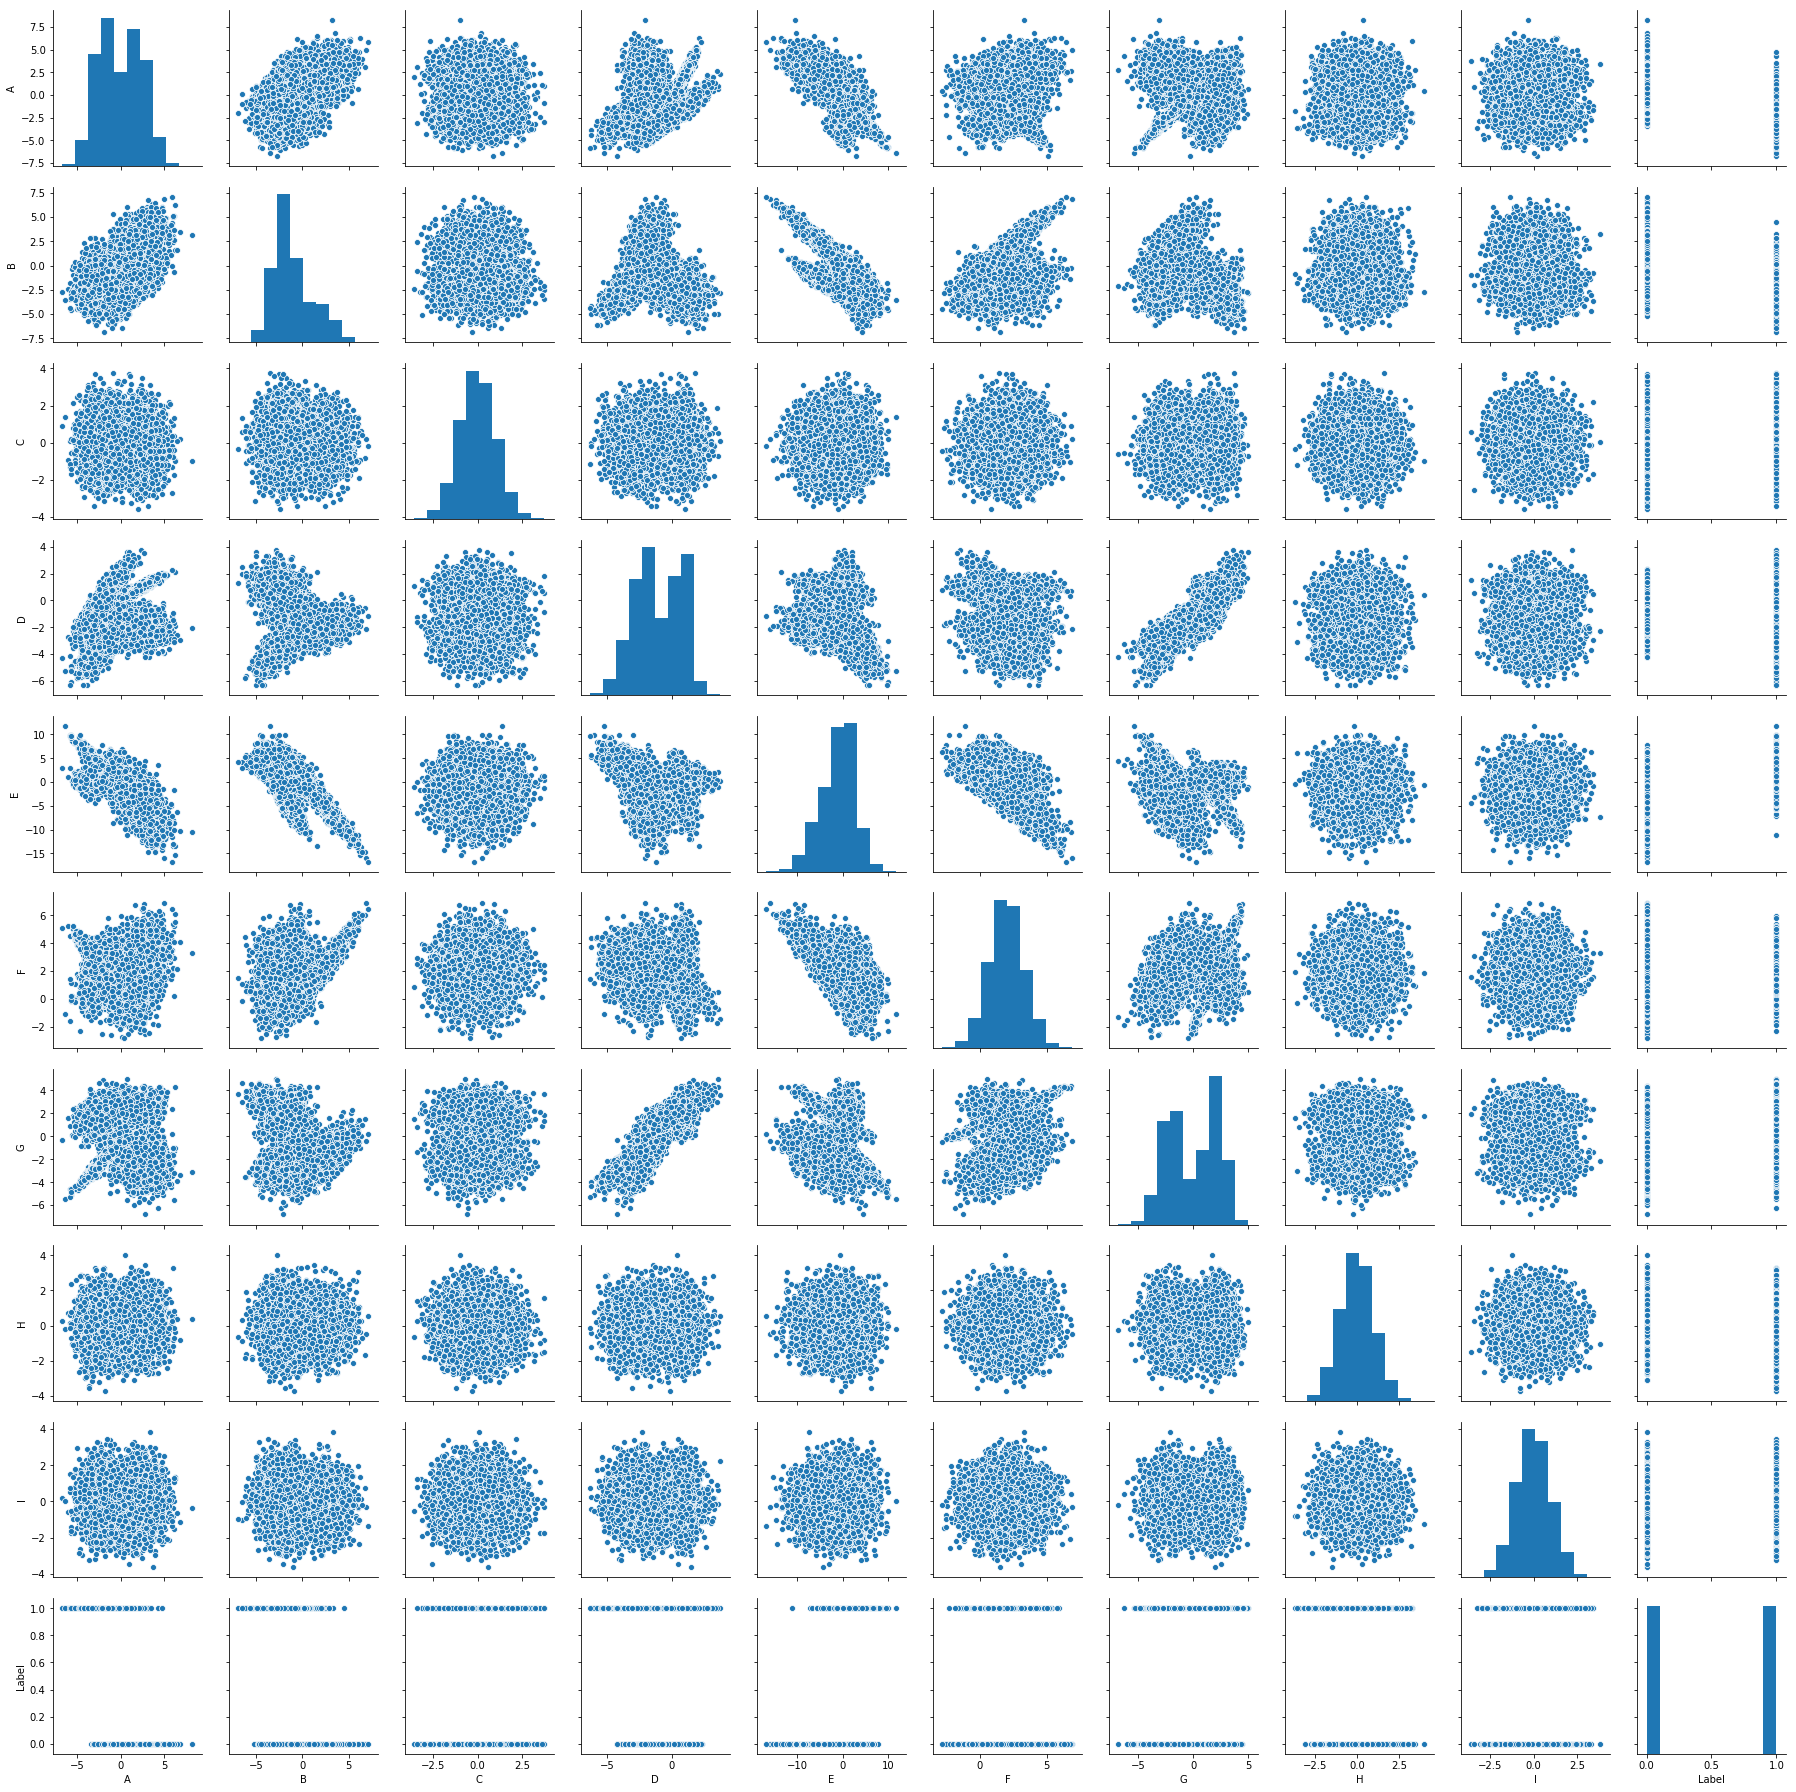

In [12]:
# Her özellik için verileri görselleştirin (pairplot, distplot etc.).
import seaborn as sns
sns.pairplot(df)

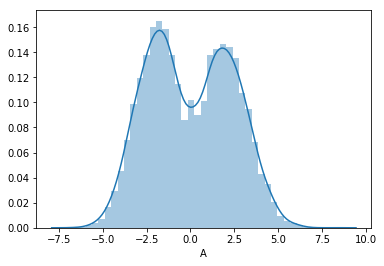

In [13]:
sns.distplot(df['A'])

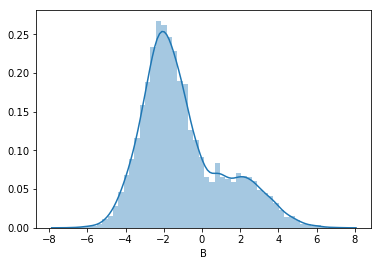

In [14]:
sns.distplot(df['B'])

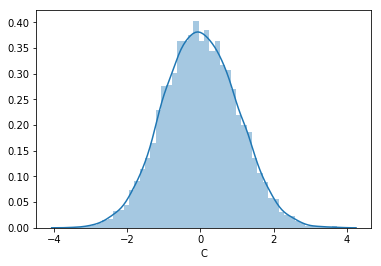

In [15]:
sns.distplot(df['C'])

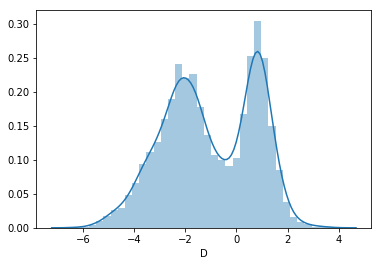

In [16]:
sns.distplot(df['D'])

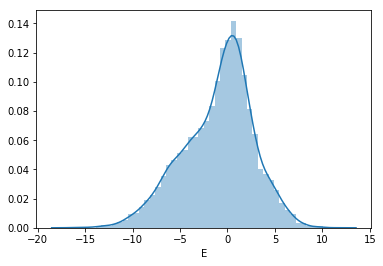

In [18]:
sns.distplot(df['E'])

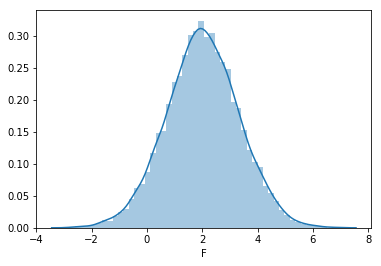

In [19]:
sns.distplot(df['F'])

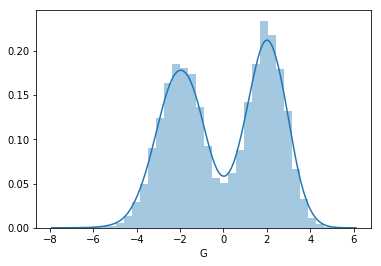

In [20]:
sns.distplot(df['G'])

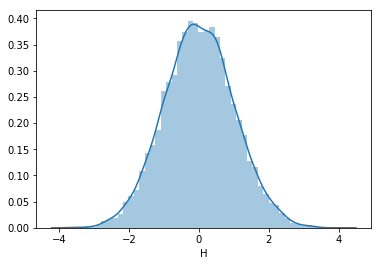

In [21]:
sns.distplot(df['H'])

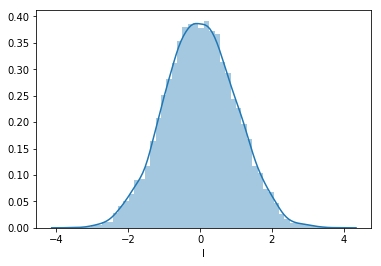

In [22]:
sns.distplot(df['I'])

In [17]:
# Korelasyon matrisi çizin.
df.corr()

,A,B,C,D,E,F,G,H,I,Label
A,1.000000,0.475540,-0.017420,0.369423,-0.779957,0.066801,0.076522,0.000242,-0.003851,-0.827383
B,0.475540,1.000000,-0.009106,-0.198418,-0.725945,0.257191,-0.333581,0.002245,0.003442,-0.460591
C,-0.017420,-0.009106,1.000000,-0.005140,0.004946,0.018591,0.007261,-0.002698,-0.000366,0.004585
D,0.369423,-0.198418,-0.005140,1.000000,-0.305216,-0.142264,0.895971,-0.013030,-0.009711,-0.271423
E,-0.779957,-0.725945,0.004946,-0.305216,1.000000,-0.543672,-0.227263,0.007940,0.007284,0.644730
F,0.066801,0.257191,0.018591,-0.142264,-0.543672,1.000000,0.175031,-0.011528,-0.009937,-0.004253
G,0.076522,-0.333581,0.007261,0.895971,-0.227263,0.175031,1.000000,-0.017993,-0.012860,-0.003718
H,0.000242,0.002245,-0.002698,-0.013030,0.007940,-0.011528,-0.017993,1.000000,-0.011155,-0.003832
I,-0.003851,0.003442,-0.000366,-0.009711,0.007284,-0.009937,-0.012860,-0.011155,1.000000,0.000261
Label,-0.827383,-0.460591,0.004585,-0.271423,0.644730,-0.004253,-0.003718,-0.003832,0.000261,1.000000


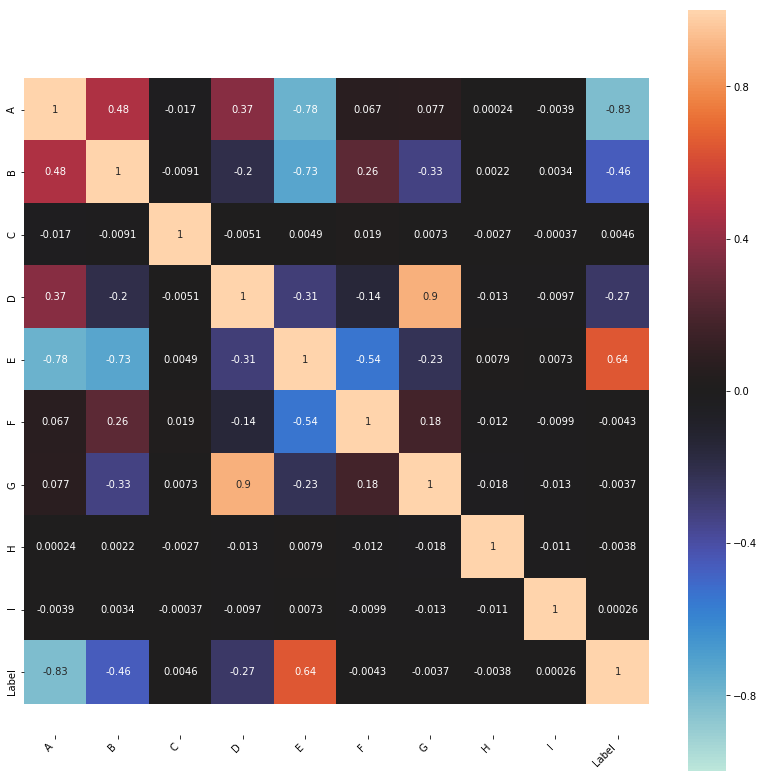

In [18]:
import matplotlib.pyplot as plt
corr = df.corr()

plt.figure(figsize=(14, 14))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    square=True, annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_ylim(len(corr)+0.5, -0.5);

In [19]:
# İlişkili bulduğunuz özellikleri eleyin (korelasyon matrisini kontrol ederek)
df5= df.drop([ "A","E"],axis=1)

In [20]:
# Aykırı değerleri işleyin (IsolationForest, Z-score, IQR kullanabilirsiniz)
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df5))
z

array([[2.73980971e-01, 5.97494434e-01, 1.81060410e+00, ...,
        1.87330912e-01, 9.23499405e-01, 1.00080032e+00],
       [1.28893863e+00, 3.86268584e-01, 5.84216451e-01, ...,
        3.17348275e-04, 9.66949227e-01, 1.00080032e+00],
       [1.32601221e+00, 4.05548411e-01, 1.76146207e-01, ...,
        5.75839586e-01, 1.33505557e+00, 9.99200320e-01],
       ...,
       [1.93109732e+00, 4.09221094e-01, 5.12671678e-01, ...,
        1.48363838e-01, 7.17151541e-01, 1.00080032e+00],
       [7.99421934e-01, 1.62607608e+00, 8.15038782e-02, ...,
        8.29761668e-01, 1.49510354e+00, 9.99200320e-01],
       [1.64811453e+00, 1.25661632e+00, 6.10634260e-01, ...,
        9.19194711e-01, 2.68552466e-01, 1.00080032e+00]])

In [21]:
len(np.where(z > 3)[0])

134

In [22]:
outliers = list(set(np.where(z > 3)[0]))
df5= df5.drop(outliers,axis = 0).reset_index(drop = False)
display(df5)

,index,B,C,D,F,G,H,I,Label
0,0,-0.411827,-0.600695,-4.250619,1.019036,-5.717909,-0.179226,-0.914161,0
1,1,-3.782512,0.390637,0.023942,1.185315,1.218147,0.007708,-0.957374,0
2,2,-3.862467,-0.407272,-0.704430,2.080082,1.416647,0.583622,1.332092,1
3,3,-3.129374,-0.499094,0.575599,1.997441,1.938695,-0.113648,0.882476,0
4,4,2.582148,-1.755320,-2.224739,2.062468,-2.614919,-1.154300,0.303457,0
...,...,...,...,...,...,...,...,...,...
9870,9995,2.334336,-0.215422,-0.743142,1.608074,-0.916196,-0.322332,2.451602,0
9871,9996,-1.234190,-0.049615,1.360582,2.779653,2.658484,0.584260,0.241696,0
9872,9997,3.162008,-0.410973,-1.933915,3.057350,-2.399711,-0.140276,0.717553,0
9873,9998,-2.726791,-1.637191,-1.164315,3.053202,1.490092,0.837437,1.491268,1


In [ ]:
y_new = yb[list(data["index"])]
len(y_new)

In [ ]:
y_new

In [ ]:
X_new = data

In [ ]:
# Özellikleri ölçekleyin. (scaling)
from sklearn.preprocessing import StandardScaler, MinMaxScaler
X_scaled = StandardScaler().fit_transform(X_new)
X_scaled

In [25]:
# Veri kümesini eğitim ve test verisetlerine ayırın.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y_new, test_size=0.3, random_state=42)

In [26]:
# Karar Ağacını içe aktarın, farklı hiperparametreleri deneyerek algoritmayı ayarlayın. (hyperpara)
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train,y_train)
pred = clf.predict(X_test)
print("Accuracy of train:",clf.score(X_train,y_train))
print("Accuracy of test:",clf.score(X_test,y_test))

Accuracy of train: 0.9220196759259259
Accuracy of test: 0.9088761390482619


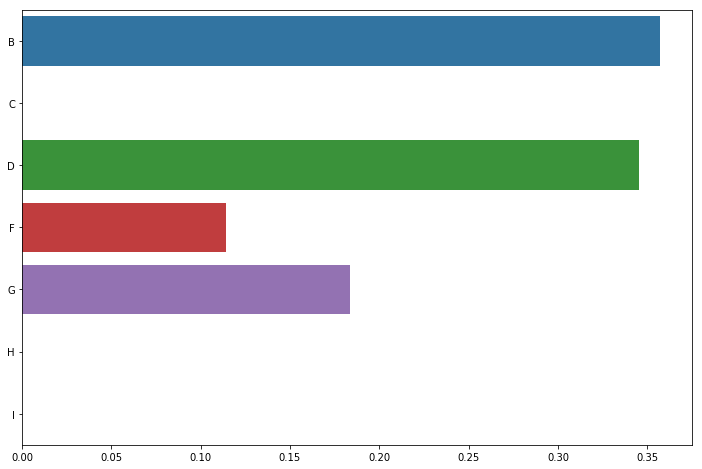

In [27]:
# Öznitelik önemlerini (feature importances) görselleştirin.
plt.figure(figsize=(12, 8))
importance = clf.feature_importances_
sns.barplot(x=importance, y=X.columns)
plt.show()

In [28]:
# Hata matrisini oluşturun ve accuracy, recall, precision ve f1-score değerlerini hesaplayın.
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred)
cm

array([[1353,  114],
       [ 156, 1340]])

In [29]:
# Classification Report
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, f1_score
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1467
           1       0.92      0.90      0.91      1496

    accuracy                           0.91      2963
   macro avg       0.91      0.91      0.91      2963
weighted avg       0.91      0.91      0.91      2963



In [30]:
# Metrics
print("Precision = {}".format(precision_score(y_test, pred, average='macro')))
print("Recall = {}".format(recall_score(y_test, pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, pred)))
print("F1 Score = {}".format(f1_score(y_test, pred,average='macro')))

Precision = 0.9091079383397005
Recall = 0.9090061568408736
Accuracy = 0.9088761390482619
F1 Score = 0.9088743849097868


In [ ]:
# XGBoostClassifier'ı içe aktarın, farklı hiperparametreleri deneyerek algoritmayı ayarlayın.
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV  

param_dict = {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2),
    'learning_rate': [0.00001,0.001,0.01,0.1,1,2],
    'n_estimators': [10,190,200,210,500,1000,2000]
    
}

xgc = XGBClassifier(booster='gbtree', learning_rate =0.01, n_estimators=200, max_depth=5, min_child_weight=1, 
                      gamma=0, subsample=0.8, colsample_bytree=0.8, objective= 'binary:logistic', nthread=4, 
                      scale_pos_weight=1, seed=27)

clf2 = GridSearchCV(xgc,param_dict,cv=3, n_jobs = -1).fit(X_train,y_train)
pred2 = clf2.predict(X_test)

In [ ]:
print("Tuned: {}".format(clf2.best_params_)) 
print("Mean of the cv scores is {:.6f}".format(clf2.best_score_))
print("Train Score {:.6f}".format(clf2.score(X_train,y_train)))
print("Test Score {:.6f}".format(clf2.score(X_test,y_test)))
print("Seconds used for refitting the best model on the train dataset: {:.6f}".format(clf2.refit_time_))
print(classification_report(y_test,pred2))

In [ ]:
# Öznitelik önemlerini (feature importances) görselleştirin.
plt.figure(figsize=(12, 8))
importance2 = model.feature_importances_
sns.barplot(x=importance, y=X.columns)
plt.show()

In [ ]:
# Hata matrisini oluşturun ve accuracy, recall, precision ve f1-score değerlerini hesaplayın.
cm2 = confusion_matrix(y_test, pred)
cm2

In [ ]:
print("Precision = {}".format(precision_score(y_test, best_preds, average='macro')))
print("Recall = {}".format(recall_score(y_test, best_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, best_preds)))
print("F1 Score = {}".format(f1_score(y_test,  best_preds,average='macro')))

In [ ]:
y.value count()

# Sonucunuzu değerlendirin ve veri setimiz için en iyi performans gösteren algoritmayı seçin.
Karar ağacı %90 doğruluk oranı vermiştir.